<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/flownet_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Author: Hughes Perreault

FlowNet optical flow estimator in inference.

Original GitHub: https://github.com/NVIDIA/flownet2-pytorch

Install required packages.

In [ ]:
%pip install -U torchvision==0.4.1 -f https://download.pytorch.org/whl/cu101/torch_stable.html scipy==1.1.0 scikit-image tensorboardX colorama tqdm setproctitle

Clone the repo.

In [2]:
import os
# get flownet2-pytorch source
if not os.path.exists('flownet2-pytorch'):
  !git clone https://github.com/NVIDIA/flownet2-pytorch.git

Cloning into 'flownet2-pytorch'...
remote: Enumerating objects: 557, done.
remote: Total 557 (delta 0), reused 0 (delta 0), pack-reused 557
Receiving objects: 100% (557/557), 6.28 MiB | 31.84 MiB/s, done.
Resolving deltas: 100% (311/311), done.


Install the custom layers used in the repo.

In [ ]:
!cd flownet2-pytorch && bash install.sh

Download the pre-trained weights.

In [4]:
file_name = 'FlowNet2-S_checkpoint.pth.tar'
if not os.path.exists(file_name):
  !gdown 'https://drive.google.com/u/0/uc?export=download&confirm=m5go&id=1V61dZjFomwlynwlYklJHC-TLfdFom3Lg'

Downloading...
From: https://drive.google.com/u/0/uc?export=download&confirm=m5go&id=1V61dZjFomwlynwlYklJHC-TLfdFom3Lg
To: /content/FlowNet2-S_checkpoint.pth.tar
155MB [00:02, 55.8MB/s]


Import libraries. In order for Colab to see our previously installed layers, we need to restart the runtime. Because of this, you might have to restart the execution from here. This phenomenon is discussed here: https://stackoverflow.com/questions/57831187/need-to-restart-runtime-before-import-an-installed-package-in-colab.

In [1]:
%cd flownet2-pytorch
import torch
import numpy as np
import argparse
try:
  from models import FlowNet2S
  from utils.frame_utils import read_gen
except:
  os.kill(os.getpid(), 9)
%cd ..

/content/flownet2-pytorch
/content


Initialize the network.

In [2]:
import sys
sys.argv = ['--rgb_max 255.0']
parser = argparse.ArgumentParser()
parser.add_argument("--rgb_max", type=float, default=255.)
args = parser.parse_args()
net = FlowNet2S(args).cuda()

Load the pre-trained weights using Pytorch's state_dict.

In [3]:
dict = torch.load("FlowNet2-S_checkpoint.pth.tar")
net.load_state_dict(dict["state_dict"])

<All keys matched successfully>

Load an image pair, convert them to pytorch tensors and feed them to the network.

In [4]:
from skimage import io
import cv2
import os

IMG_BASE_DIR = 'https://raw.githubusercontent.com/gabilodeau/INF6804/master/images'
IMG_PAIR_NAMES = ['in000225.jpg', 'in000227.jpg']
img_pair = []
for img_name in IMG_PAIR_NAMES:
  img_pair.append(cv2.resize(io.imread(os.path.join(IMG_BASE_DIR, img_name)), (512, 512)))

tensor_pair = np.array(img_pair).transpose(3, 0, 1, 2)
tensor_pair = torch.from_numpy(tensor_pair.astype(np.float32)).unsqueeze(0).cuda()
result = net(tensor_pair)[0].squeeze()
data = result.data.cpu().numpy().transpose(1, 2, 0)

Convert the optical flow numerical data to an rgb image, then display our image pair and our flow rgb representation.

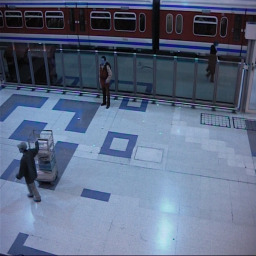

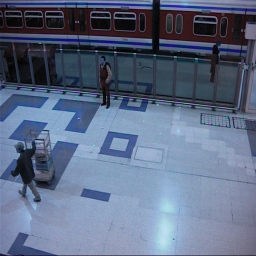

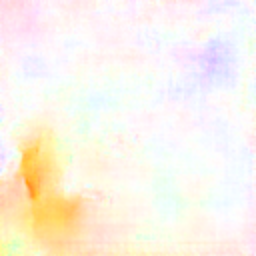

In [5]:
from utils.flow_utils import flow2img
from google.colab.patches import cv2_imshow

flow_image = flow2img(data)

imshow_size = (256, 256)
cv2_imshow(cv2.resize(img_pair[0], imshow_size))
cv2_imshow(cv2.resize(img_pair[1], imshow_size))
cv2_imshow(cv2.resize(flow_image, imshow_size))